# Title: Heart Disease Prediction
`Author`: [Hammad_zahid](mrhammadzahid24@gmail.com)\
`Date`: 11/25/2025\
`Dataset`:[Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

In [2]:
%timeit
# import libraries for dataset
import pandas as pd
import numpy as np
# import libraries for data visulization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder , MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBRFClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer,KNNImputer,IterativeImputer
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the data
df = pd.read_csv('heart_disease_uci.csv')

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

Dataset Overview:
Shape: (920, 16)

First few rows:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3           

In [4]:
print( '='*50)
print('Data set Information')
print('='*50)
print(f'data info is {df.info()}')

Data set Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
data info is None


In [5]:
# age colum 
df['age'].min(),df['age'].max()

(np.int64(28), np.int64(77))

In [6]:
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

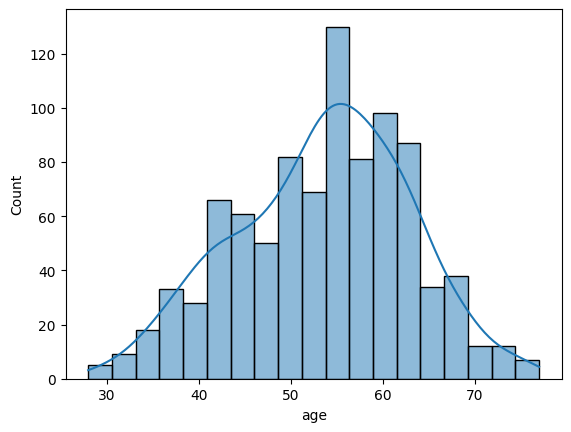

In [7]:
# draw a histogram to see the distrubution of age column
sns.histplot(df['age'],kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


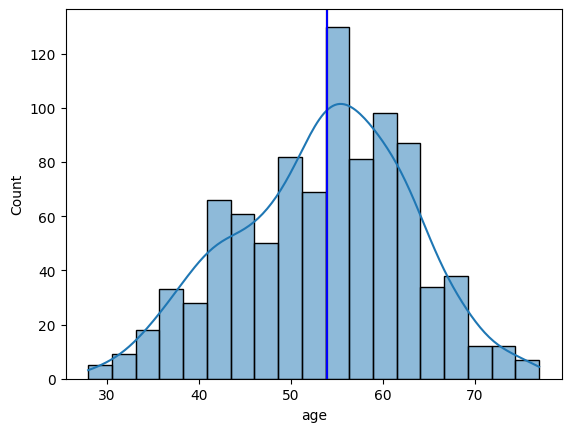

In [8]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].median(),color='red')
plt.axvline(df['age'].median(),color='green')
plt.axvline(df['age'].mode()[0],color='blue')

# print the value of mean, medin and mode of age column
print('Mean:',df['age'].mean())
print("Median:",df['age'].median())
print("Mode:",df['age'].mode()[0])

Let's explore the gender based distribution of dataset for age column.

In [9]:
fig = px.histogram(data_frame=df, x='age',color='sex')
fig.show()

In [10]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [11]:
# calculate the percentage of male and female value count in the data
male_count = 726
female_count = 194
total_count= male_count + female_count

# calculate persentages
male_percentage = (male_count / total_count)*100
female_count = (female_count / total_count)*100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}% ")
print(f"Feamale percentage of in data: {female_count:.2f}%")

# defference
diffrence_count= (total_count - female_count)
print(f'Difference of man: {diffrence_count:.2f}')

# difference percentage


Male percentage in the data: 78.91% 
Feamale percentage of in data: 21.09%
Difference of man: 898.91


In [12]:
# finde the values count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [13]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [14]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

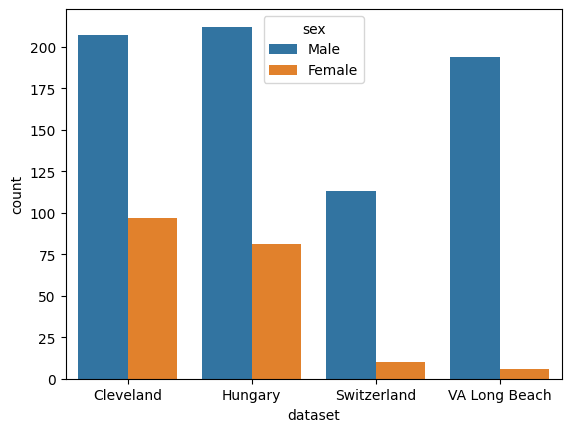

In [15]:
# plot the countplot of dataset column
sns.countplot(data=df, x='dataset',hue='sex')

In [16]:
fig = px.bar(data_frame=df,x='dataset',color='sex')
fig.show()

In [17]:
print(df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [18]:
# make a plot ofage column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x= 'age' , color='dataset')
fig.show()

# Output:
1. The minimum age to have a heart disease starts from 28 year old.
2. Most of the people get heart disease at the age of 53-55 years
3. Most of the males and females get are with heart disease at the age of 54-55 years.
4. we have higest number of people from Cleveland        (304) and lovwer is Switzerland      (123)
5. The highest number of females in the VA Long Beach.


## Let's explore cp (chest pain) column:


In [19]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

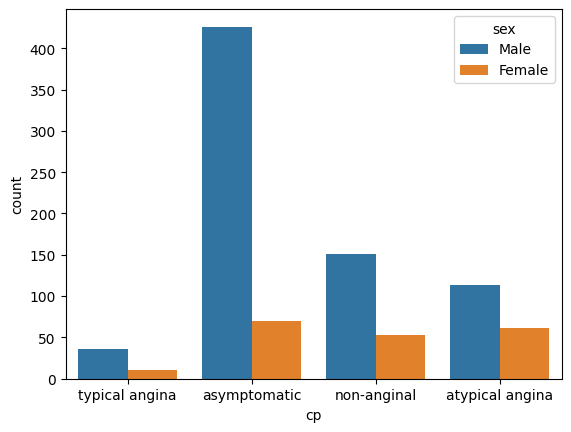

In [20]:
# count plot of cp column by sex column
sns.countplot(df,x='cp',hue='sex')

<Axes: xlabel='cp', ylabel='count'>

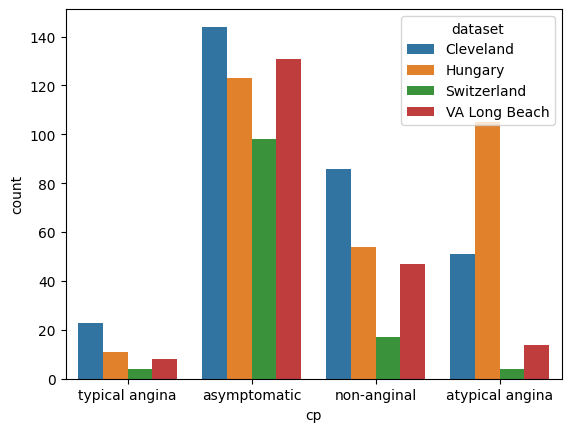

In [21]:
# count plot of cp column by dataset column
sns.countplot(df,x='cp',hue='dataset')

In [22]:
# draw the plot of age column grouped by cp column
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

## let's explore the trestbps (resting blood pressure) column:
The normal resting blood pressure is (120/80) mm hg.

In [23]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

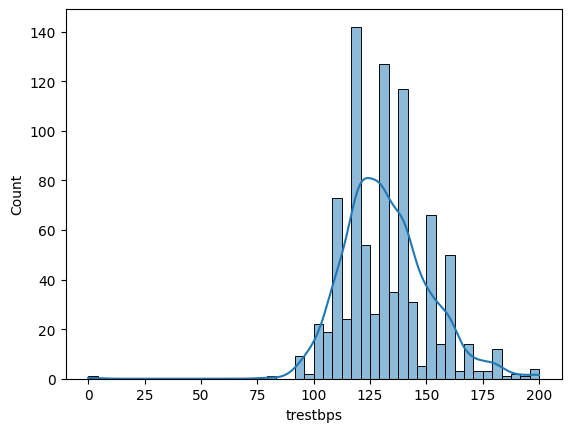

In [24]:
# creat a histplot of trestbps column
sns.histplot(df['trestbps'],kde=True)


<span style="color:yellow; font-size:150%; font-weight: bold; "> Dealing with missing values </span>

In [25]:
# deal with missing values in treastbps column
# finde the percentage of missing values in trestbps colum
print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum() / len(df) *100:.2f}%")



Percentage of missing values in trestbps column: 6.41%


In [26]:
# impute the missing values of trestbps column using iterative imputer
# creat an object of iterative
imputer = IterativeImputer(max_iter=10,random_state=42)

# fit the imputer on trestbps column
imputer.fit(df[['trestbps']])
# transform the data 
df['trestbps']= imputer.transform(df[['trestbps']])

# check the missing values in trestbps column
print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")

Missing values in trestbps column: 0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [28]:
# impute missing values using iterative imputer(float-values) for ca, oldpeak, thalch, chol columns
# creat an object of iterative imputer
imputer_1 = IterativeImputer(max_iter=10, random_state=42)
# fit_transform the imputer in ca, oldpeak, thal , chol column
#df[['ca','oldpeak','thalch ','chol']] = imputer_1.fit_transform(df[['ca','oldpeak','thalch ','chol']])
df['ca'] = imputer_1.fit_transform(df[['ca']])
df['oldpeak'] = imputer_1.fit_transform(df[['oldpeak']])
df['thalch'] = imputer_1.fit_transform(df[['chol']])

## Let's impute the missing values in thal(object) column by using ML models.

#### steps:
1. import Libraries
2. Load the data
3. find the columns with missing values and store in an object.
4. finde the columns based on data type
    1. numeric
    2. Categoricals
    3. Boolean
5. Define the function to impute missing values
6. Apply the function to our datset with missing values
7. check the missing values after imputation    

In [29]:
categorical_cols=['thal','ca','slope','exang','restecg','fbs','cp','sex','num']
bool_cols = ['fbs','exang']
numeric_cols = ['oldpeak','thalch','chol','trestbps','age']


In [30]:
print(f"The missing values in thal column are: {df['thal'].isnull().sum()}")

The missing values in thal column are: 486


In [31]:
# see know object values 
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [32]:
df['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect', nan], dtype=object)

In [33]:


def impute_multiple_categorical_rf(df):
    """
    Impute missing values in specific categorical columns using RF classifier.
    Columns included:
        ['thal', 'slope', 'fbs', 'exang', 'chol', 'restecg']
    """
    
    df = df.copy()

    impute_cols = ['thal', 'slope', 'fbs', 'exang', 'chol', 'restecg']

    # -----------------------------------------------------------
    # STEP 1 — Encode ALL categorical columns (except missing ones)
    # -----------------------------------------------------------
    all_object_cols = df.select_dtypes(include=['object']).columns.tolist()

    encoders = {}
    for col in all_object_cols:
        le = LabelEncoder()
        # Fit only on non-missing values
        nonmissing = df[col].dropna().astype(str)
        le.fit(nonmissing)
        encoders[col] = le
        
        # Transform non-missing values
        df.loc[df[col].notna(), col] = le.transform(df.loc[df[col].notna(), col].astype(str))
        
        # Keep NaN untouched
        df[col] = df[col].astype('float')

    # -----------------------------------------------------------
    # STEP 2 — Impute each selected column
    # -----------------------------------------------------------
    for target_col in impute_cols:

        if target_col not in df.columns:
            continue
        
        missing_mask = df[target_col].isna()
        
        if missing_mask.sum() == 0:
            continue

        # Train data (rows with target values)
        train_df = df[~missing_mask]
        X_train = train_df.drop(columns=[target_col])
        y_train = train_df[target_col].astype(int)

        # Missing rows
        X_missing = df[missing_mask].drop(columns=[target_col])

        # Train RF
        rf = RandomForestClassifier(n_estimators=200, random_state=42)
        rf.fit(X_train, y_train)

        # Predict missing values
        y_pred = rf.predict(X_missing)

        # Fill missing values
        df.loc[missing_mask, target_col] = y_pred

    # -----------------------------------------------------------
    # STEP 3 — Decode all categorical columns back
    # -----------------------------------------------------------
    for col, le in encoders.items():
        df[col] = df[col].astype(int)
        df[col] = le.inverse_transform(df[col])

    return df


In [34]:
df = impute_multiple_categorical_rf(df)


In [35]:
# let's impute other column with missing values 
(df.isnull().sum() / len(df)* 100 ).sort_values(ascending=False)

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

<span style="color:yellow; font-size:150%; font-weight: bold; "> Dealing with Outliers </span>

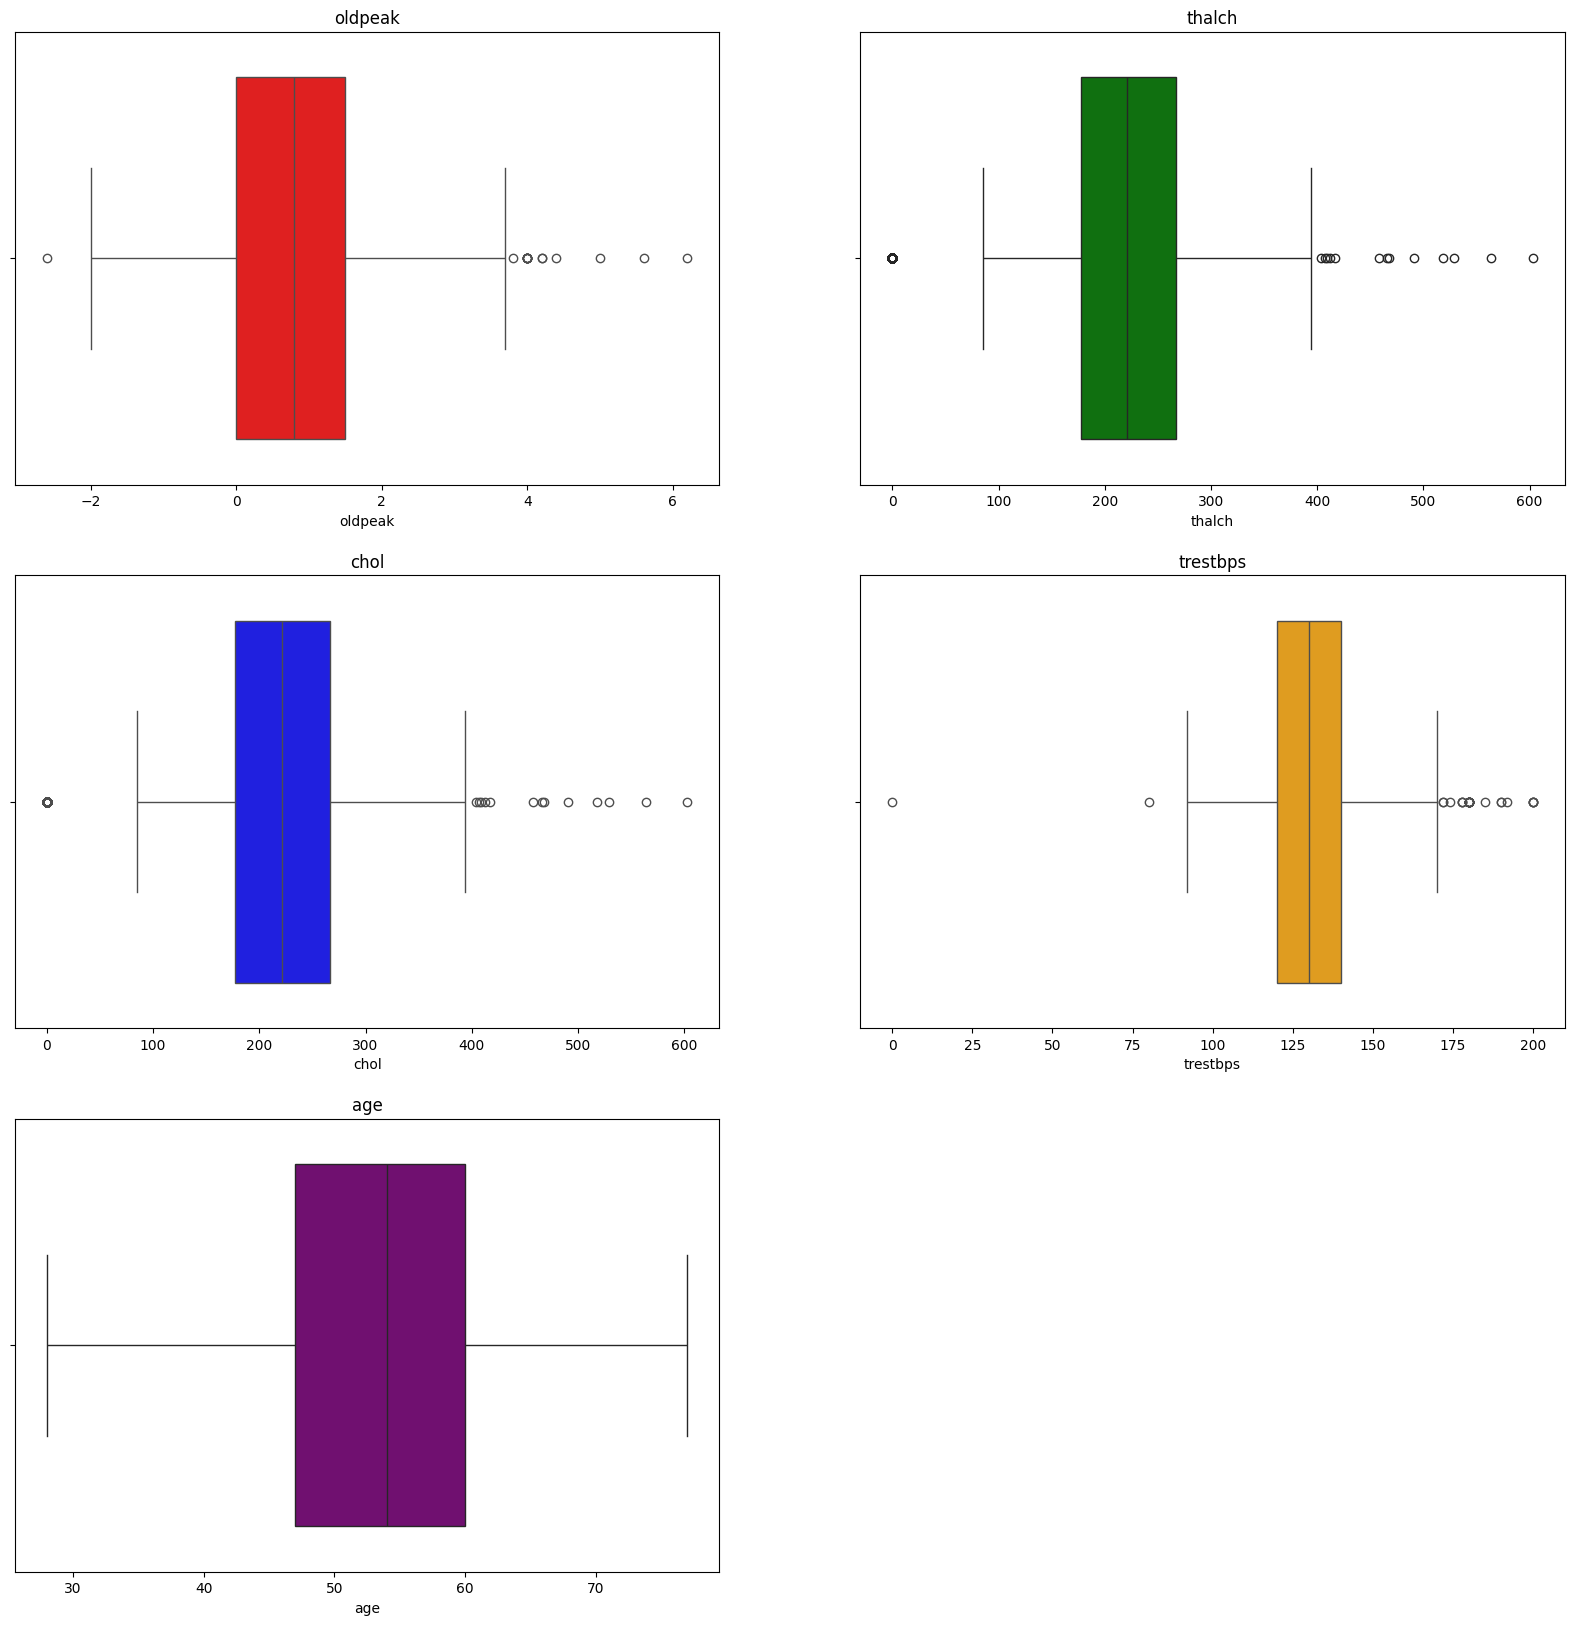

In [36]:
# creat  box plots for all numeric columns for loop and subplot
plt.figure(figsize=(20,20))
colors = ['red','green','blue','orange','purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3,2, i+1)
    sns.boxplot(x=df[col],color=colors[i])
    plt.title(col)
plt.show()    


In [37]:
fig= px.box(df,y=numeric_cols, color_discrete_sequence=colors)
fig.update_layout(title='Box plot for Numeric columns', height=800,width=800)
fig.show()

In [38]:
# print the row from wher trestbp values is 0
df[df['trestbps']==0]

# remove this row from data
df= df[df['trestbps'] !=0]

In [39]:
df['trestbps'].shape

(919,)

In [40]:
# print the row in df where chol is 0
df[df['chol']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.000000,0.0,False,normal,0.0,False,0.700000,upsloping,0.676375,reversable defect,1
598,599,34,Male,Switzerland,asymptomatic,115.000000,0.0,False,normal,0.0,False,0.200000,upsloping,0.676375,reversable defect,1
599,600,35,Male,Switzerland,asymptomatic,132.132404,0.0,False,normal,0.0,True,0.878788,flat,0.676375,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.000000,0.0,False,normal,0.0,True,1.000000,flat,0.676375,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.000000,0.0,False,normal,0.0,False,2.800000,upsloping,0.676375,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.000000,0.0,False,normal,0.0,False,0.500000,upsloping,0.676375,reversable defect,1
819,820,63,Male,VA Long Beach,non-anginal,130.000000,0.0,True,st-t abnormality,0.0,False,3.000000,flat,0.676375,reversable defect,0
822,823,48,Male,VA Long Beach,non-anginal,102.000000,0.0,False,st-t abnormality,0.0,True,1.000000,downsloping,0.676375,reversable defect,1
839,840,56,Male,VA Long Beach,asymptomatic,132.132404,0.0,False,lv hypertrophy,0.0,True,0.878788,flat,0.676375,reversable defect,1


-----

<span style="color:yellow; font-size:150%; font-weight: bold; "> Dealing with Machine Learning  </span>

In [41]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [42]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The Traget column is `num` which is the predicted attribute. we will use this column to predict the heart disease.
The unique values in this column are: [0,1,2,3,4], which states that there are 5 types of heart disease,
- `0 = no heart disease.`
- `1 = midle heart disease.`
- `2 = moderate heart disease.`
- `3 = severe heart diseade.`
- `4 = cricitical heart disease.`


In [51]:
# split the data into X and y 
X = df.drop('num',axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns ans save 
# Dictionary to store encoders
X_encoded = X.copy()
encoders = {}

# Encoding
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object' or X_encoded[col].dtype.name == 'category':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
        encoders[col] = le

# -----------------------------
# Later... inverse transform
# -----------------------------
for col, le in encoders.items():
    X_encoded[col] = le.inverse_transform(X_encoded[col])
       
#------------------------------------------------
coder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col]=Label_encoder.fit_transform(X[col])
    else:
        pass    


# split the date into train test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)




Enlist all the model taht you will use to predict the heart disease. these models should be classifiers  for multi-class classification.

1. Logistic Regression
2. KNN
3. Decision Tree
4. NB
5. SVM
6. Random Forest
7. XGBoost
8. linghtGBM
9. AdaBoost
10. GradientBoosting



In [61]:
# import all model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
#from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error
# pipeline
from sklearn.pipeline import Pipeline


In [ ]:
# Creat a list of models to evaluate
models = [
    ('LogisticRegression:', LogisticRegression(random_state=42)),
    ('KNeighborsClassifier:', KNeighborsClassifier()),
    ('SVC:', SVC(random_state=42)),
    ('DecisionTreeClassifier:',DecisionTreeClassifier(random_state=42)),
    ('RandomForestClassifier:',RandomForestClassifier(random_state=42)),
    ('AdaBoostClassifier:',AdaBoostClassifier(random_state=42)),
    ('GradientBoostingClassifier:',GradientBoostingClassifier(random_state=42)),
    ('XG:',XGBClassifier(random_state=42)),
    ('Naive bayes:',GaussianNB())
 ]

best_model = None
best_accuracy = 0.0

# Iterate over the model and evaluate their performance
for name, model in models:
    # creat a pipeline fro each model
    pipeline=Pipeline([
        ('model',model)
    ])
    # perform cross-validation
    scores= cross_val_score(pipeline, X_train,y_train,cv=5)
    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the tranining data
    pipeline.fit(X_train,y_train)

    # Make prediction on the tesy data
    y_pred = pipeline.predict(X_test)

    # calculate accuracy score
    accuracy = accuracy_score(y_test,y_pred)

    # print the performance metrics
    print('Model:',name)
    print('Cross-validation Accuracy:',mean_accuracy)
    print('Test Accuracy:',accuracy)
    print()

    # check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline


# Retrieve the best model
print("best Model",best_model)

# save the best model
import pickle
pickle.dump(best_model,open('heart_disease_model.pkl','wb'))


Model: LogisticRegression:
Cross-validation Accuracy: 0.5482993197278911
Test Accuracy: 0.5163043478260869

Model: KNeighborsClassifier:
Cross-validation Accuracy: 0.5863945578231292
Test Accuracy: 0.5869565217391305

Model: SVC:
Cross-validation Accuracy: 0.5659863945578231
Test Accuracy: 0.5760869565217391

Model: DecisionTreeClassifier:
Cross-validation Accuracy: 0.5863945578231291
Test Accuracy: 0.6086956521739131

Model: RandomForestClassifier:
Cross-validation Accuracy: 0.6408163265306123
Test Accuracy: 0.6304347826086957

Model: AdaBoostClassifier:
Cross-validation Accuracy: 0.6639455782312925
Test Accuracy: 0.6032608695652174

Model: GradientBoostingClassifier:
Cross-validation Accuracy: 0.6299319727891156
Test Accuracy: 0.6467391304347826

Model: XG:
Cross-validation Accuracy: 0.6122448979591837
Test Accuracy: 0.6195652173913043

Model: Naive bayes:
Cross-validation Accuracy: 0.5687074829931973
Test Accuracy: 0.532608695652174

best Model Pipeline(steps=[('model', GradientBoos

In [69]:
accuracy_dict = {}

for name, model in models:

    pipeline = Pipeline([
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    accuracy_dict[name] = accuracy

# Convert to DataFrame
df = pd.DataFrame({
    "Model": list(accuracy_dict.keys()),
    "Accuracy": list(accuracy_dict.values())
})

# Plot
fig = px.bar(
    df,
    x="Model",
    y="Accuracy",
    title="Model Accuracy Comparison",
    text="Accuracy"
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


----

In [70]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

def select_best_tuned_model(X_train, y_train, models_with_params, cv=5, scoring='accuracy'):
    """
    Selects the best hyperparameter-tuned model for multiclass classification.

    Parameters:
        X_train (DataFrame): training features
        y_train (Series): training labels
        models_with_params (dict): 
            {
              "ModelName": {
                    "model": ModelObject,
                    "params": {"model__param": [values]}
               }
            }
        cv (int): number of folds for cross-validation
        scoring (str): scoring metric, default = accuracy

    Returns:
        best_model (fitted model object)
        best_name (model name)
        best_score (best cross-validation accuracy)
        results_df (comparison table)
    """

    results = []
    best_score = -1
    best_model = None
    best_name = None

    # Stratified K-fold for multiclass
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    for name, mp in models_with_params.items():
        model = mp['model']
        params = mp['params']

        # Pipeline with scaler
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])

        grid = GridSearchCV(
            estimator=pipe,
            param_grid=params,
            scoring=scoring,
            cv=skf,
            n_jobs=-1,
            verbose=0
        )

        # Fit tuning
        grid.fit(X_train, y_train)

        # Extract results
        results.append({
            "Model": name,
            "Best Score": grid.best_score_,
            "Best Params": grid.best_params_
        })

        # Track best overall model
        if grid.best_score_ > best_score:
            best_score = grid.best_score_
            best_model = grid.best_estimator_
            best_name = name

    results_df = pd.DataFrame(results)

    return best_model, best_name, best_score, results_df


In [73]:


models_with_params = {
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=500),
        "params": {
            "model__C": [0.01, 0.1, 1, 10],
            "model__solver": ["lbfgs"]
        }
    },

    "SVC": {
        "model": SVC(),
        "params": {
            "model__C": [0.1, 1, 10],
            "model__kernel": ["rbf", "linear"]
        }
    },

    "DecisionTree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "model__max_depth": [3, 5, 10, None],
        }
    },

    "RandomForest": {
        "model": RandomForestClassifier(),
        "params": {
            "model__n_estimators": [50, 100, 200],
            "model__max_depth": [5, 10, None]
        }
    }
}
best_model, best_name, best_score, results_df = select_best_tuned_model(
    X_train, y_train, models_with_params
)
print("Best Model:", best_name)
print("Best Score:", best_score)
print("Best Params:", best_model.get_params())

print("\nAll Results:")
print(results_df)


Best Model: RandomForest
Best Score: 0.6421768707482993
Best Params: {'memory': None, 'steps': [('scaler', StandardScaler()), ('model', RandomForestClassifier(max_depth=10, n_estimators=200))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': RandomForestClassifier(max_depth=10, n_estimators=200), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__bootstrap': True, 'model__ccp_alpha': 0.0, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__max_leaf_nodes': None, 'model__max_samples': None, 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__min_weight_fraction_leaf': 0.0, 'model__monotonic_cst': None, 'model__n_estimators': 200, 'model__n_jobs': None, 'model__oob_score': False, 'model__random_state': None, 'model__verbose': 0, 'model__warm_start': False}

All Results:
                Model  Best Score  

In [74]:
import plotly.express as px

fig = px.bar(results_df, x="Model", y="Best Score", text="Best Score",
             title="Hyperparameter-Tuned Model Comparison")
fig.update_layout(xaxis_tickangle=-45)
fig.show()


### ⭐ Universal Auto-Tuned Model Selector (Multiclass, Any Dataset)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

def auto_select_best_multiclass_model(X, y, models_with_params, cv=5, scoring="accuracy"):
    """
    Automatically selects and tunes the best multiclass model for any dataset.

    Steps:
      - Detects numeric and categorical columns
      - Applies appropriate preprocessing (imputation + scaling/encoding)
      - Performs hyperparameter tuning
      - Returns best model + results table

    Parameters:
        X: DataFrame - Features
        y: Series/array - Target labels
        models_with_params: dict of models + param grids
        cv: int - cross-validation folds
        scoring: str - scoring metric

    Returns:
        best_model, best_name, best_score, results_df
    """

    # Identify column types
    numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
    categorical_cols = X.select_dtypes(include=["object", "category"]).columns

    # Preprocessing for numeric data
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    # ColumnTransformer to combine preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_cols),
            ("cat", categorical_transformer, categorical_cols),
        ]
    )

    # Stratified CV for multiclass
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    results = []
    best_score = -1
    best_model = None
    best_name = None

    # Loop through all models
    for name, mp in models_with_params.items():
        model = mp["model"]
        params = mp["params"]

        # Full pipeline: preprocessing + model
        pipeline = Pipeline([
            ("preprocess", preprocessor),
            ("model", model)
        ])

        # Grid Search
        grid = GridSearchCV(
            pipeline,
            param_grid=params,
            scoring=scoring,
            cv=skf,
            n_jobs=-1,
            verbose=0
        )

        grid.fit(X, y)

        results.append({
            "Model": name,
            "Best Score": grid.best_score_,
            "Best Params": grid.best_params_
        })

        if grid.best_score_ > best_score:
            best_score = grid.best_score_
            best_model = grid.best_estimator_
            best_name = name

    results_df = pd.DataFrame(results)
    return best_model, best_name, best_score, results_df
